In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from matplotlib.ticker import ScalarFormatter

In [44]:
# Load data with slice and mean
ste_01 = np.genfromtxt('../measurements/2024_04_30/Ste20-GFP_005-1.csv', delimiter=',')

In [45]:
def powerspectrum(patch, t_step, method="welch"):
    if len(patch)%2:
        patch = patch[:-1]
    if method=="welch":
        freq, Pxx_den = scipy.signal.welch(patch, fs = 1/t_step)
    elif method=="power":
        freq, Pxx_den = scipy.signal.periodogram(patch,fs=1/t_step, scaling="density")
    return(freq, Pxx_den)

In [134]:
def plotspectra(dir, metric=3, norm=True, tstep=15, method="welch", alpha=0.5, title=""):
    '''
    dir: Relative path to directory. Start with "../measurements/"
    metric: Use 1 for MEAN. Use 3 for MAX.
    norm: Normalize each power spectrum so that total power is 1? 
        Else allow differences in total power.
    tstep: Time between each frame
    '''
    all_den = []
    fig, ax = plt.subplots()
    for fname in os.listdir(dir):
        if ".csv" in fname:
            print(fname)
            meas = np.genfromtxt(dir+fname, delimiter=',')
            patch = meas[1:,metric] # first row is labels
            freq, Pxx_den = powerspectrum(patch, tstep, method=method)
            period = 1/freq
            if norm:
                Pxx_den = Pxx_den/np.mean(Pxx_den)
            all_den.append(Pxx_den)
            plt.plot(period, Pxx_den, alpha=alpha, linewidth=3)
    avg = np.mean(all_den, axis=0)
    plt.plot(period, avg, linewidth=3, color="black")
    plt.title(title)
    plt.xlabel("Period (seconds)")
    plt.ylabel("Power density")
    plt.xscale("log")
    ax.xaxis.set_major_formatter(ScalarFormatter())
    #plt.ylim(0,5)
    ax.invert_xaxis()
    return fig, ax

cell12.csv
cell1.csv
cell19.csv
cell16.csv
cell11.csv
cell9.csv
cell6.csv
cell3.csv
cell19-2.csv
cell15.csv
cell18.csv
cell8.csv
cell5.csv
cell2.csv
cell10.csv


/tmp/ipykernel_30388/605199797.py:17: RuntimeWarning: divide by zero encountered in divide
  period = 1/freq


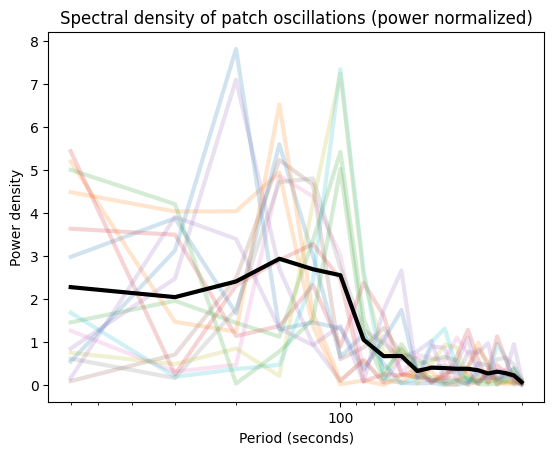

In [114]:
dir = "../CroppedMovies/2024_06_04/1nuc/"
plotspectra(dir, metric=3, alpha=0.2, title="Spectral density of patch oscillations (power normalized)")

cell12.csv
cell1.csv
cell19.csv
cell16.csv
cell11.csv
cell9.csv
cell6.csv
cell3.csv
cell19-2.csv
cell15.csv
cell18.csv
cell8.csv
cell5.csv
cell2.csv
cell10.csv


/tmp/ipykernel_30388/605199797.py:17: RuntimeWarning: divide by zero encountered in divide
  period = 1/freq


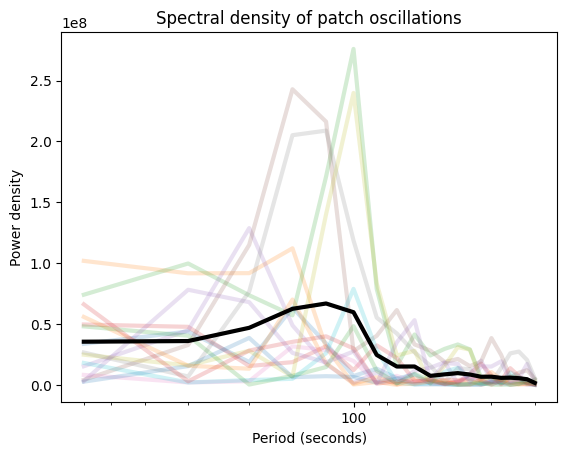

In [115]:
dir = "../CroppedMovies/2024_06_04/1nuc/"
plotspectra(dir, metric=3, alpha=0.2, norm=False, title="Spectral density of patch oscillations")

In [199]:
def plotspectra(dir, metric=3, norm=True, tstep=15, method="welch", alpha=0.5, title=""):
    '''
    dir: Relative path to directory. Start with "../measurements/"
    metric: Use 1 for MEAN. Use 3 for MAX.
    norm: Normalize each power spectrum so that total power is 1? 
        Else allow differences in total power.
    tstep: Time between each frame
    '''
    all_den = []
    fig, ax = plt.subplots(figsize=(6,4))
    for fname in os.listdir(dir):
        if ".csv" in fname:
            print(fname)
            meas = np.genfromtxt(dir+fname, delimiter=',')
            patch = meas[1:,metric] # first row is labels
            freq, Pxx_den = powerspectrum(patch, tstep, method=method)
            period = 1/freq
            if norm:
                Pxx_den = Pxx_den/np.mean(Pxx_den)
            all_den.append(Pxx_den)
            plt.plot(period, Pxx_den, alpha=alpha, linewidth=3)
    avg = np.mean(all_den, axis=0)
    plt.plot(period, avg, linewidth=10, color="grey", alpha=0.5, label="Average spectrum from 15 cells")
    plt.title(title)
    plt.xlabel("Period (seconds)")
    plt.ylabel("Power density")
    plt.xscale("log")
    ax.xaxis.set_major_formatter(ScalarFormatter())
    #plt.ylim(0,5)
    ax.invert_xaxis()
    return fig, ax

cell12.csv
cell1.csv
cell19.csv
cell16.csv
cell11.csv
cell9.csv
cell6.csv
cell3.csv
cell19-2.csv
cell15.csv
cell18.csv
cell8.csv
cell5.csv
cell2.csv
cell10.csv


/home/dinosaur/.local/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:589: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/tmp/ipykernel_30388/3326421031.py:17: RuntimeWarning: divide by zero encountered in divide
  period = 1/freq
/tmp/ipykernel_30388/3295496449.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, Pxx_den/np.mean(Pxx_den), linewidth=3, color="C00", label="Spectrum from trace (left)")


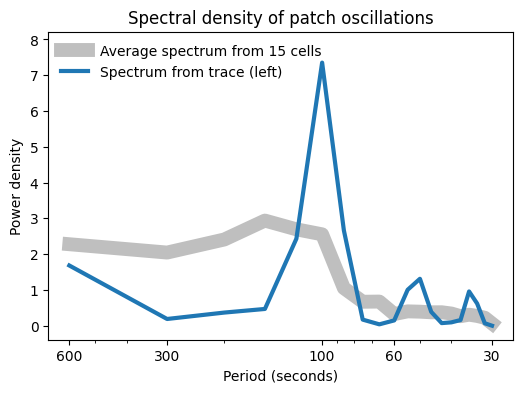

In [206]:
dir = "../CroppedMovies/2024_06_04/1nuc/"
fig, ax = plotspectra(dir, metric=3, alpha=0, title="Spectral density of patch oscillations")

metric = 3
file = "../CroppedMovies/2024_06_04/1nuc/cell15.csv"
meas = np.genfromtxt(file, delimiter=',')
patch = meas[1:,metric] # first row is labels
freq, Pxx_den = powerspectrum(patch, t_step=15, method="welch")
plt.plot(1/freq, Pxx_den/np.mean(Pxx_den), linewidth=3, color="C00", label="Spectrum from trace (left)")
plt.xlabel("Period (seconds)")
plt.ylabel("Power density")
plt.xscale("log")
plt.xticks([30,60,100,300,600])
plt.legend(loc="upper left",frameon=False)
ax.xaxis.set_major_formatter(ScalarFormatter())

Text(0.5, 1.0, 'Trace of polarity patch intensity over time')

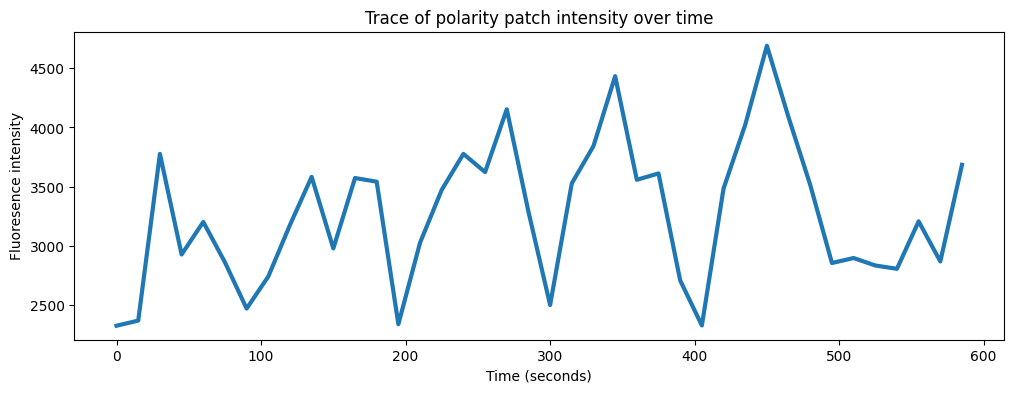

In [184]:
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(np.arange(0,len(patch)*15, 15), patch, linewidth=3, color="C00")
plt.xlabel("Time (seconds)")
plt.ylabel("Fluoresence intensity")
plt.title("Trace of polarity patch intensity over time")

In [28]:
patch

array([2970., 2198., 2486., 2761., 4075., 4783., 4029., 4516., 3659.,
       2874., 3527., 3058., 4722., 3311., 2733., 2681., 2218., 2298.,
       2253., 3449., 3167., 3585., 2957., 2133., 2239., 2115., 2085.,
       2255., 2439., 2068., 2207., 2744., 2681., 3172., 2423., 3075.,
       2447., 2261., 2440., 2270.])

reallyVeryNice-3-2nuc-2.csv
reallyVeryNice-5-2nuc-2.csv
great-2-27-107.csv
reallyVeryNice-4-2nuc-2.csv
anotherGoodie-1.csv
reallyVeryNice-1-2nuc-1.csv
reallyVeryNice-5-2nuc.csv
reallyVeryNice-3-2nuc-1.csv
reallyVeryNice-1-2samePole-2.csv
reallyVeryNice-1-2samePole-1.csv
reallyVeryNice-4-2nuc-1.csv
reallyVeryNice-10.csv
reallyVeryNice-2nuc1bud.csv


/tmp/ipykernel_85440/583166317.py:11: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, Pxx_den, alpha=0.5)
/tmp/ipykernel_85440/583166317.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, np.mean(all_den, axis=0), linewidth=3, color="black")


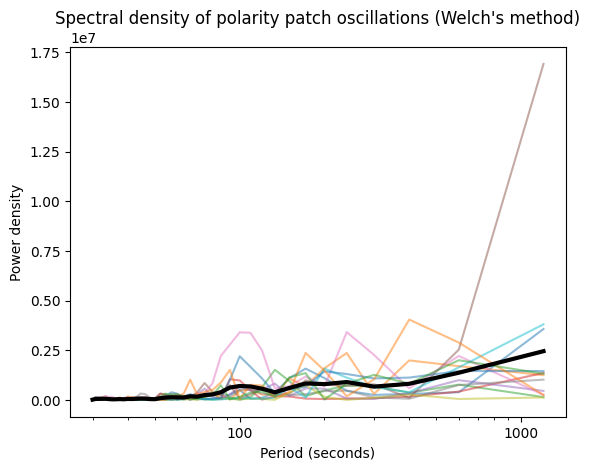

In [226]:
metric = 1 # Use 1 for MEAN. For max use 3 instead.
dir = "../measurements/2024_05_15/"
all_den = []
fig, ax = plt.subplots()
for fname in os.listdir(dir):
    print(fname)
    meas = np.genfromtxt(dir+fname, delimiter=',')
    patch = meas[1:,metric] # first row is labels
    freq, Pxx_den = powerspectrum(patch, 15)
    all_den.append(Pxx_den)
    plt.plot(1/freq, Pxx_den, alpha=0.5)
plt.plot(1/freq, np.mean(all_den, axis=0), linewidth=3, color="black")
plt.title("Spectral density of polarity patch oscillations (Welch's method)")
plt.xlabel("Period (seconds)")
plt.ylabel("Power density")
plt.xscale("log")
ax.xaxis.set_major_formatter(ScalarFormatter())

reallyVeryNice-3-2nuc-2.csv
reallyVeryNice-5-2nuc-2.csv
great-2-27-107.csv
reallyVeryNice-4-2nuc-2.csv
anotherGoodie-1.csv
reallyVeryNice-1-2nuc-1.csv
reallyVeryNice-5-2nuc.csv
reallyVeryNice-3-2nuc-1.csv
reallyVeryNice-1-2samePole-2.csv
reallyVeryNice-1-2samePole-1.csv
reallyVeryNice-4-2nuc-1.csv
reallyVeryNice-10.csv
reallyVeryNice-2nuc1bud.csv


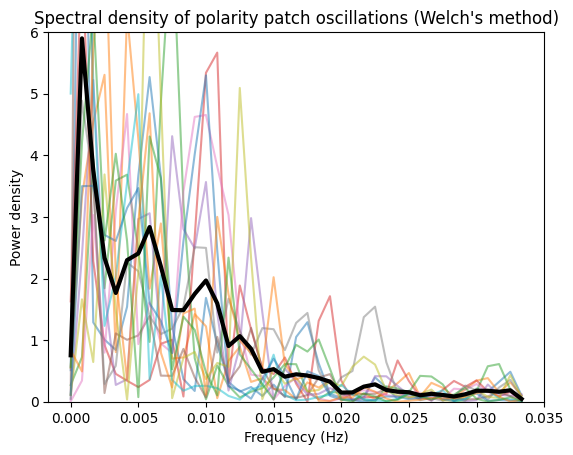

In [236]:
from matplotlib.ticker import ScalarFormatter
metric = 1 # Use 1 for MEAN. For max use 3 instead.
dir = "../measurements/2024_05_15/"
all_den = []
all_norm_den = []
fig, ax = plt.subplots()
for fname in os.listdir(dir):
    print(fname)
    meas = np.genfromtxt(dir+fname, delimiter=',')
    patch = meas[1:,metric] # first row is labels
    freq, Pxx_den = powerspectrum(patch, 15)
    all_den.append(Pxx_den)
    norm_den = Pxx_den/np.mean(Pxx_den)
    all_norm_den.append(norm_den)
    ax.plot(freq, norm_den, alpha=0.5)
plt.plot(freq, np.mean(all_norm_den, axis=0), linewidth=3, color="black")
plt.ylim((0,6))
plt.title("Spectral density of polarity patch oscillations (Welch's method)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power density")
ax.xaxis.set_major_formatter(ScalarFormatter())

reallyVeryNice-3-2nuc-2.csv
reallyVeryNice-5-2nuc-2.csv
reallyVeryNice-4-2nuc-2.csv
reallyVeryNice-1-2nuc-1.csv
reallyVeryNice-5-2nuc.csv
reallyVeryNice-3-2nuc-1.csv
reallyVeryNice-1-2samePole-2.csv
reallyVeryNice-1-2samePole-1.csv
reallyVeryNice-4-2nuc-1.csv


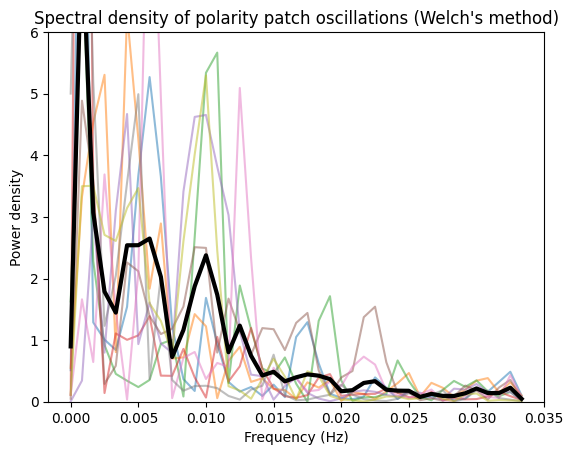

In [237]:
from matplotlib.ticker import ScalarFormatter
metric = 1 # Use 1 for MEAN. For max use 3 instead.
dir = "../measurements/2024_05_15/2nuc/"
all_den = []
all_norm_den = []
fig, ax = plt.subplots()
for fname in os.listdir(dir):
    print(fname)
    meas = np.genfromtxt(dir+fname, delimiter=',')
    patch = meas[1:,metric] # first row is labels
    freq, Pxx_den = powerspectrum(patch, 15)
    all_den.append(Pxx_den)
    norm_den = Pxx_den/np.mean(Pxx_den)
    all_norm_den.append(norm_den)
    ax.plot(freq, norm_den, alpha=0.5)
plt.plot(freq, np.mean(all_norm_den, axis=0), linewidth=3, color="black")
plt.ylim((0,6))
plt.title("Spectral density of polarity patch oscillations (Welch's method)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power density")
ax.xaxis.set_major_formatter(ScalarFormatter())

reallyVeryNice-3-2nuc-2.csv
reallyVeryNice-5-2nuc-2.csv
great-2-27-107.csv
reallyVeryNice-4-2nuc-2.csv
anotherGoodie-1.csv
reallyVeryNice-1-2nuc-1.csv
reallyVeryNice-5-2nuc.csv
reallyVeryNice-3-2nuc-1.csv
reallyVeryNice-1-2samePole-2.csv
reallyVeryNice-1-2samePole-1.csv
reallyVeryNice-4-2nuc-1.csv
reallyVeryNice-10.csv
reallyVeryNice-2nuc1bud.csv


/tmp/ipykernel_85440/2362752296.py:15: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1/freq, norm_den, alpha=0.5)
/tmp/ipykernel_85440/2362752296.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, np.mean(all_norm_den, axis=0), linewidth=3, color="black")


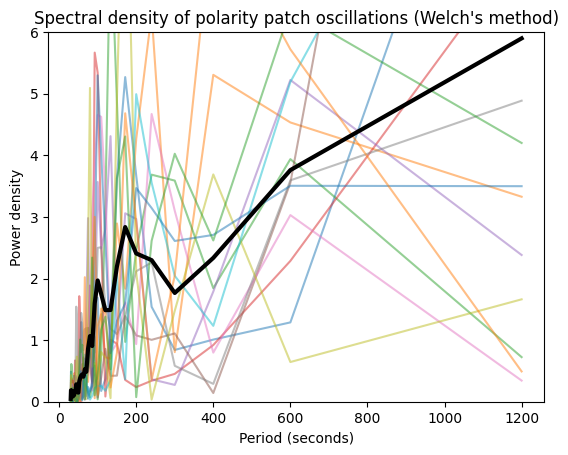

In [235]:
from matplotlib.ticker import ScalarFormatter
metric = 1 # Use 1 for MEAN. For max use 3 instead.
dir = "../measurements/2024_05_15/"
all_den = []
all_norm_den = []
fig, ax = plt.subplots()
for fname in os.listdir(dir):
    print(fname)
    meas = np.genfromtxt(dir+fname, delimiter=',')
    patch = meas[1:,metric] # first row is labels
    freq, Pxx_den = powerspectrum(patch, 15)
    all_den.append(Pxx_den)
    norm_den = Pxx_den/np.mean(Pxx_den)
    all_norm_den.append(norm_den)
    ax.plot(1/freq, norm_den, alpha=0.5)
plt.plot(1/freq, np.mean(all_norm_den, axis=0), linewidth=3, color="black")

plt.ylim((0,6))
plt.title("Spectral density of polarity patch oscillations (Welch's method)")
plt.xlabel("Period (seconds)")
plt.ylabel("Power density")
ax.xaxis.set_major_formatter(ScalarFormatter())

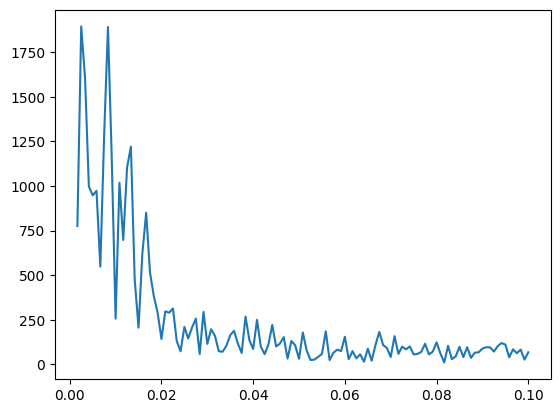

In [58]:
metric = 1 # Use 1 for MEAN. For max use 3 instead.
dir = "../measurements/2024_04_30/"
all_den = []
for fname in os.listdir(dir):
    print(fname)
    meas = np.genfromtxt(dir+fname, delimiter=',')
    patch = meas[1:,metric] # first row is labels
    freq, Pxx_den = powerspectrum(patch, 5)
    all_den.append(Pxx_den)
    plt.plot(freq, Pxx_den, alpha=0.5)
plt.plot(freq, np.mean(all_den, axis=0), linewidth=3, color="black")

In [59]:
f, Pxx_den = scipy.signal.welch(mean_01, fs = 1/5)

/home/dinosaur/.local/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:589: UserWarning: nperseg = 256 is greater than input length  = 241, using nperseg = 241
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


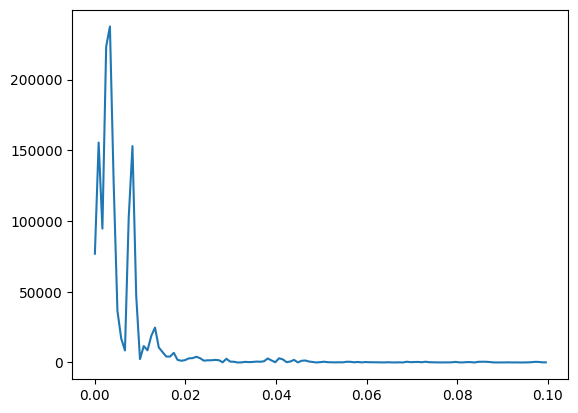

In [63]:
plt.plot(f[0:], Pxx_den[0:])

/tmp/ipykernel_85440/4107692105.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1/f[0:], Pxx_den[0:])


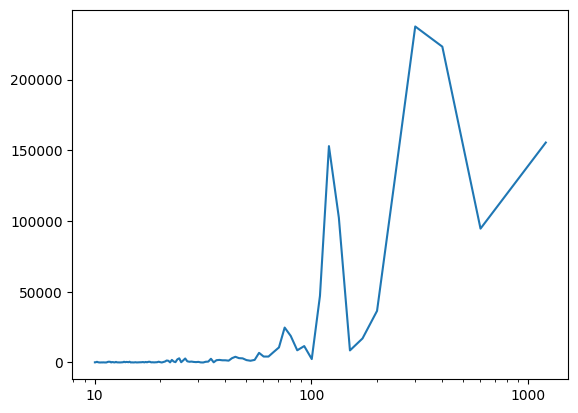

In [92]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots()
ax.plot(1/f[0:], Pxx_den[0:])
plt.xscale("log")
ax.xaxis.set_major_formatter(ScalarFormatter())

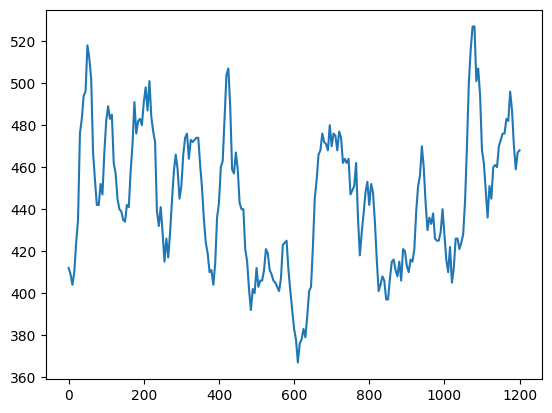

In [64]:
sec = np.arange(len(mean_01))*5
plt.plot(sec, mean_01)

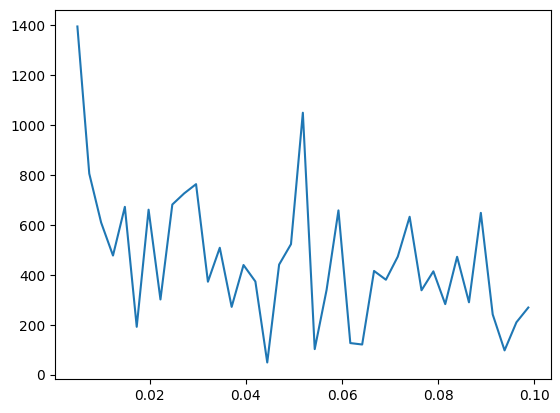

In [28]:
plt.plot(freq_01[2:], abs(fourier_01[2:]))
#plt.scatter(freq_01[10], abs(fourier_01[10]), color= "C01")

In [232]:
ste_01.shape[0]%2

0

In [290]:
filtered_fourier_01 = fourier_01.copy()
filtered_fourier_01[0:2] = 0
filtered_fourier_01[100:] = 0
reconstructed_01 = np.fft.irfft(filtered_fourier_01)
filtered_fourier_01[0:10] = 0
filtered_fourier_01[11:] = 0
reduced_01 = np.fft.irfft(filtered_fourier_01)

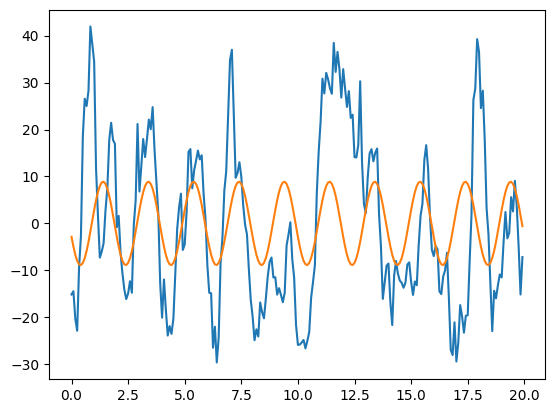

In [342]:
plt.plot(mins, reconstructed_01)
plt.plot(mins, reduced_01)

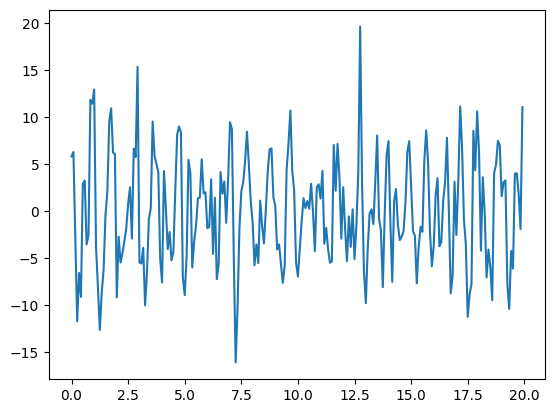

In [323]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig,ax = plt.subplots()
filtered_fourier_01 = fourier_01.copy()

def animate(i):
    ax.clear()
    filtered_fourier_01[0:1+i] = 0
    reconstructed_01 = np.fft.irfft(filtered_fourier_01)
    signal, = ax.plot(mins, reconstructed_01)
    return signal,
        
ani = FuncAnimation(fig, animate, repeat=True, frames=20)    
ani.save("Test.gif", dpi=300, writer=PillowWriter(fps=3))

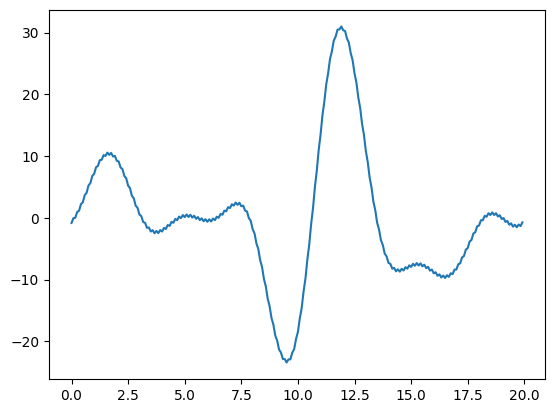

In [334]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig,ax = plt.subplots()
filtered_fourier_01 = fourier_01.copy()
filtered_fourier_01[0:2] = 0
reconstructed_01 = np.fft.irfft(filtered_fourier_01)
signal, = ax.plot(mins, reconstructed_01)

def animate(i):
    ax.clear()
    filtered_fourier_01[-50-i:-1] = 0
    reconstructed_01 = np.fft.irfft(filtered_fourier_01)
    signal, = ax.plot(mins, reconstructed_01)
    return signal,
        
ani = FuncAnimation(fig, animate, repeat=False, frames=65, blit=True)    
ani.save("DecreaseNoise.gif", dpi=300, writer=PillowWriter(fps=5))

In [187]:
import scipy

In [102]:
x, y = scipy.signal.periodogram(mean_01,fs=1/5, scaling="density")

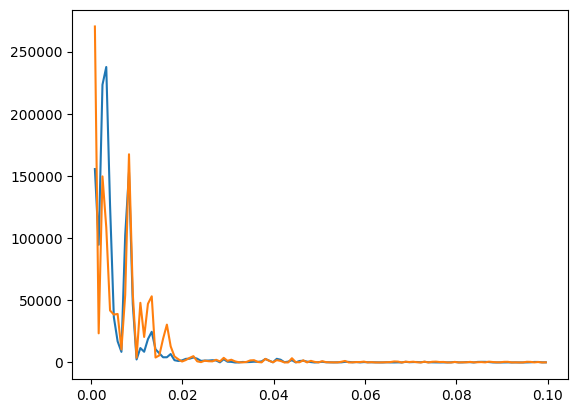

In [105]:
plt.plot(f[1:], Pxx_den[1:])
plt.plot(x[1:],y[1:], color="C01")

In [108]:
x, y = scipy.signal.periodogram(mean_01,fs=1/5,scaling="spectrum")

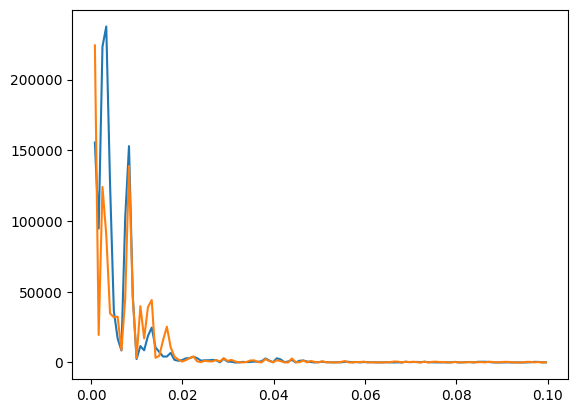

In [112]:
plt.plot(f[1:], Pxx_den[1:])
plt.plot(x[1:],y[1:]*1000, color="C01")